# 📌 Intro Of This Notebook
The aim of this study is to clacify spam email by using different machine learning algorithms. For this purpose, I will use Multinomial Naive Bayes Classifier,Support Vecrot Machine Classifier with Radial basis function kernel (RBF),k Neighbors classifier,Decision Tree Classifier and Random Forest Classifier.
I will give a short description about those algorithms.

# 📑 About the Dataset:
- The used dataset is a CSV file.
- It contains 5573 individual emails.
- Each email has classified by Ham or Spam.


# 📥 Download Email Datasets:
Here is Dataset Download link: 👇
- From kaggle => "https://www.kaggle.com/varunmurthymokarala/email-msg-spam-detection/download"
- Form my Github => ""

# 📩 Importing the Libraries


In [26]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd

# 💻 Load and Read DataSets


In [24]:
#read the CSV file
df=pd.read_csv("email.csv")

In [25]:
#print top 5 values
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
#Catagorized the Dataframe
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df['Message']
Y=df['spam']

In [27]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y)

# Naive Bayes Algorithm
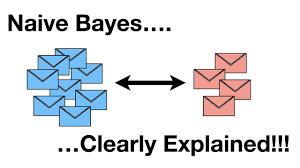
<br>
<b>What is Naive Bayes algorithm?</b><br>
It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
<br>
<br>
<b>What is Naive Bayes Classifier?</b>
<br>
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.
<br>
<center>
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836882/image_3_ijznzs.png">
</center>
<ul>
<li>P(h): the probability of hypothesis h being true (regardless of the data). This is known as the prior probability of h.</li>
<li>P(D): the probability of the data (regardless of the hypothesis). This is known as the prior probability.</li>
<li>P(h|D): the probability of hypothesis h given the data D. This is known as posterior probability.</li>
<li>P(D|h): the probability of data d given that the hypothesis h was true. This is known as posterior probability.</li>
</ul>

<br>
<br>





<!-- img[alt=drawing] { width: 200px; } -->
<img src="https://github.com/AshfakYeafi/Spam-Email-Classifier/blob/main/Screenshot_20210728_044231.png">

<!-- ![5-Figure1-1.png](attachment:5-Figure1-1.png) -->
<!-- ![](./pic/pic1s.png =250x) -->


In [8]:
#Create Classifier for Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [9]:
#Print Accuracy for Naive Bayes Classifier
clf_NaiveBaised.fit(X_train,y_train)
naive_acc=accuracy_score(y_test,clf_NaiveBaised.predict(X_test))
naive_acc

0.9842180774748924

In [10]:
#Create Classifier for Support Vector Machine
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [11]:
#Print Accuracy for Support Vector Machine Classifier
svm_acc=accuracy_score(y_test,clf_svm.predict(X_test))
svm_acc

0.9827833572453372

In [12]:
#Create Classifier for DecisionTreeClassifier
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])
clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [13]:
#Print Accuracy for DecisionTreeClassifier
dt_acc=accuracy_score(y_test,clf_DecisionTree.predict(X_test))
dt_acc

0.9670014347202296

In [14]:
#Function for testing custome email
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print("This is a Spam email")
    else:
        print("This is a Real email")

In [15]:
test_email_1="Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!" #Spam Email from my mail box
test_email_2="Hey Ashfak, can we get together to watch footbal game tomorrow?"   #Real Email from my mail box

In [16]:
#Predict with Naive Bayes
spam_dect(clf_NaiveBaised,test_email_1)


This is a Spam email


In [17]:
#Predict with Naive Bayes
spam_dect(clf_NaiveBaised,test_email_2)

This is a Real email


In [18]:
print(f"Niave Byes Accrucy is :{naive_acc}")
print(f"Support Vector Machine Accrucy is :{svm_acc}")
print(f"DecisionTree Accrucy is :{dt_acc}")

Niave Byes Accrucy is :0.9842180774748924
Support Vector Machine Accrucy is :0.9827833572453372
DecisionTree Accrucy is :0.9670014347202296
